In [1]:
#Install Pydrive
!pip install PyDrive

In [2]:
#Import necessary Libraries
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
#Creating a drive variable to access Google Drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
download = drive.CreateFile({'id': '1_W2gFFZmy6ZyC8TPlxB49eDFswdBsQqo'})

In [7]:
download.GetContentFile('face_mask_detection.zip')
!unzip face_mask_detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: face_mask_detection/train/Image_550.jpg  
  inflating: face_mask_detection/train/Image_5500.jpg  
  inflating: face_mask_detection/train/Image_5501.jpg  
  inflating: face_mask_detection/train/Image_5502.jpg  
  inflating: face_mask_detection/train/Image_5503.jpg  
  inflating: face_mask_detection/train/Image_5504.jpg  
  inflating: face_mask_detection/train/Image_5505.jpg  
  inflating: face_mask_detection/train/Image_5506.jpg  
  inflating: face_mask_detection/train/Image_5507.jpg  
  inflating: face_mask_detection/train/Image_5508.jpg  
  inflating: face_mask_detection/train/Image_5509.jpg  
  inflating: face_mask_detection/train/Image_551.jpg  
  inflating: face_mask_detection/train/Image_5510.jpg  
  inflating: face_mask_detection/train/Image_5511.jpg  
  inflating: face_mask_detection/train/Image_5512.jpg  
  inflating: face_mask_detection/train/Image_5513.jpg  
  inflating: face_mask_detection/train/Image_5514.jpg  

In [8]:
#Import Libraries for model building Phase
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

In [ ]:
train = pd.read_csv('face_mask_detection/Training_set_face_mask.csv')

In [9]:
labels = pd.read_csv('face_mask_detection/Training_set_face_mask.csv')   # loading the labels
labels.head()

,filename,label
0,Image_1.jpg,without_mask
1,Image_2.jpg,without_mask
2,Image_3.jpg,without_mask
3,Image_4.jpg,without_mask
4,Image_5.jpg,without_mask


In [10]:
file_paths = [[fname, 'face_mask_detection/train/' + fname] for fname in labels['filename']]

In [11]:
# Confirm if number of images is same as number of labels given
if len(labels) == len(file_paths):
    print('Number of labels i.e. ', len(labels), 'matches the number of filenames i.e. ', len(file_paths))
else:
    print('Number of labels does not match the number of filenames')

Number of labels i.e.  11264 matches the number of filenames i.e.  11264


In [12]:
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
images.head()

,filename,filepaths
0,Image_1.jpg,face_mask_detection/train/Image_1.jpg
1,Image_2.jpg,face_mask_detection/train/Image_2.jpg
2,Image_3.jpg,face_mask_detection/train/Image_3.jpg
3,Image_4.jpg,face_mask_detection/train/Image_4.jpg
4,Image_5.jpg,face_mask_detection/train/Image_5.jpg


In [13]:
train_data = pd.merge(images, labels, how = 'inner', on = 'filename')
train_data.head()   

,filename,filepaths,label
0,Image_1.jpg,face_mask_detection/train/Image_1.jpg,without_mask
1,Image_2.jpg,face_mask_detection/train/Image_2.jpg,without_mask
2,Image_3.jpg,face_mask_detection/train/Image_3.jpg,without_mask
3,Image_4.jpg,face_mask_detection/train/Image_4.jpg,without_mask
4,Image_5.jpg,face_mask_detection/train/Image_5.jpg,without_mask


In [14]:
train_data.shape[0]

11264

In [15]:
train_data['filepaths'][1]

'face_mask_detection/train/Image_2.jpg'

(77, 77, 3)


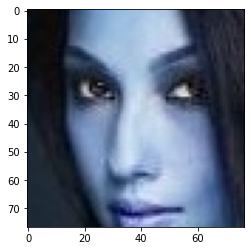

In [16]:
#Using OpenCV library for Image manipulation
import cv2
img = cv2.imread(train_data['filepaths'][1])
print(img.shape)
plt.imshow(img)

In [17]:
train_image = []
for i in tqdm(range(train_data.shape[0])):
    img = image.load_img('face_mask_detection/'+'train/' + train_data['filename'][i], target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

  0%|          | 0/11264 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 11264/11264 [00:19<00:00, 587.71it/s]


In [18]:
#Encoding the target variable as Integers
class_list = train_data['label'].tolist()
Y_train = {k:v+1 for v,k in enumerate(set(class_list))}
y_train = [Y_train[k] for k in class_list]

In [19]:
#One-hot encoding the target variable
from keras.utils import to_categorical
y = to_categorical(y_train)

In [20]:
#Creating a validation set from the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [21]:
y_test.shape

(2253, 3)

In [22]:
#Defining the Model Structure
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [23]:
#Compiling the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [25]:
#Training the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
282/282 [==============================] - 23s 82ms/step - loss: 0.0292 - accuracy: 0.9901 - val_loss: 0.1659 - val_accuracy: 0.9569
Epoch 2/10
282/282 [==============================] - 23s 81ms/step - loss: 0.0277 - accuracy: 0.9908 - val_loss: 0.1637 - val_accuracy: 0.9516
Epoch 3/10
282/282 [==============================] - 23s 82ms/step - loss: 0.0227 - accuracy: 0.9916 - val_loss: 0.2211 - val_accuracy: 0.9507
Epoch 4/10
282/282 [==============================] - 23s 81ms/step - loss: 0.0272 - accuracy: 0.9897 - val_loss: 0.1516 - val_accuracy: 0.9587
Epoch 5/10
282/282 [==============================] - 23s 81ms/step - loss: 0.0188 - accuracy: 0.9933 - val_loss: 0.1552 - val_accuracy: 0.9561
Epoch 6/10
282/282 [==============================] - 23s 81ms/step - loss: 0.0231 - accuracy: 0.9921 - val_loss: 0.1873 - val_accuracy: 0.9596
Epoch 7/10
282/282 [==============================] - 23s 81ms/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0.1891 - val_accuracy:

In [26]:
# Loading the order of the image's name that has been provided
test_image_order = pd.read_csv("face_mask_detection/Testing_set_face_mask.csv")
test_image_order.head()

,filename,label
0,Image_1.jpg,NaN
1,Image_2.jpg,NaN
2,Image_3.jpg,NaN
3,Image_4.jpg,NaN
4,Image_5.jpg,NaN


In [27]:
file_paths = [[fname, 'face_mask_detection/test/' + fname] for fname in test_image_order['filename']]

In [28]:
# Confirm if number of images is same as number of labels given
if len(test_image_order) == len(file_paths):
    print('Number of image names i.e. ', len(test_image_order), 'matches the number of file paths i.e. ', len(file_paths))
else:
    print('Number of image names does not match the number of filepaths')


Number of image names i.e.  1536 matches the number of file paths i.e.  1536


In [29]:
test_images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
test_images.head()

,filename,filepaths
0,Image_1.jpg,face_mask_detection/test/Image_1.jpg
1,Image_2.jpg,face_mask_detection/test/Image_2.jpg
2,Image_3.jpg,face_mask_detection/test/Image_3.jpg
3,Image_4.jpg,face_mask_detection/test/Image_4.jpg
4,Image_5.jpg,face_mask_detection/test/Image_5.jpg


In [30]:
test_data = pd.merge(test_images, test_image_order, how = 'inner', on = 'filename')
test_data.head()  

,filename,filepaths,label
0,Image_1.jpg,face_mask_detection/test/Image_1.jpg,NaN
1,Image_2.jpg,face_mask_detection/test/Image_2.jpg,NaN
2,Image_3.jpg,face_mask_detection/test/Image_3.jpg,NaN
3,Image_4.jpg,face_mask_detection/test/Image_4.jpg,NaN
4,Image_5.jpg,face_mask_detection/test/Image_5.jpg,NaN


In [31]:
test_data.drop('label', axis = 1, inplace=True)

(224, 224, 3)


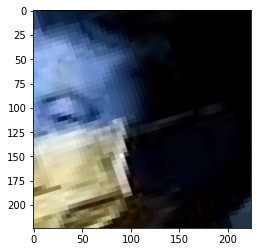

In [32]:
import cv2
img = cv2.imread(test_data['filepaths'][1])
print(img.shape)
plt.imshow(img)

In [33]:
test_image = []
for i in tqdm(range(test_data.shape[0])):
    img = image.load_img('face_mask_detection/'+'test/' + test_data['filename'][i], target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

  0%|          | 0/1536 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 1536/1536 [00:03<00:00, 477.61it/s]


In [34]:
pred = model.predict_classes(test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [35]:
pred[0]

2

In [36]:
np.round(pred[0])

2

In [37]:
res = pd.DataFrame({'filename': test_data['filename'], 'label': pred})  # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res.to_csv("submission.csv") 

# To download the csv file locally
from google.colab import files        
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>